## Grid-based Methods of Clustering

Presented by: CORPUZ, Francis James

One of the major problems with distance-based and probabilistic methods is that the shape
of the underlying clusters is already defined implicitly by the underlying distance function
or probability distribution:
* k-means algorithm implicitly assumes a spherical shape for the cluster
* EM algorithm with the generalized Gaussian assumes elliptical clusters. 


In practice, the clusters may be hard to model with a prototypical shape
implied by a distance function or probability distribution. 

Consider the clusters below. It is evident that there are two clusters of sinusoidal
shape in the data. However, virtually any choice of representatives in a k-means algorithm
will result in the representatives of one of the clusters pulling away data points from the
other.

<div>
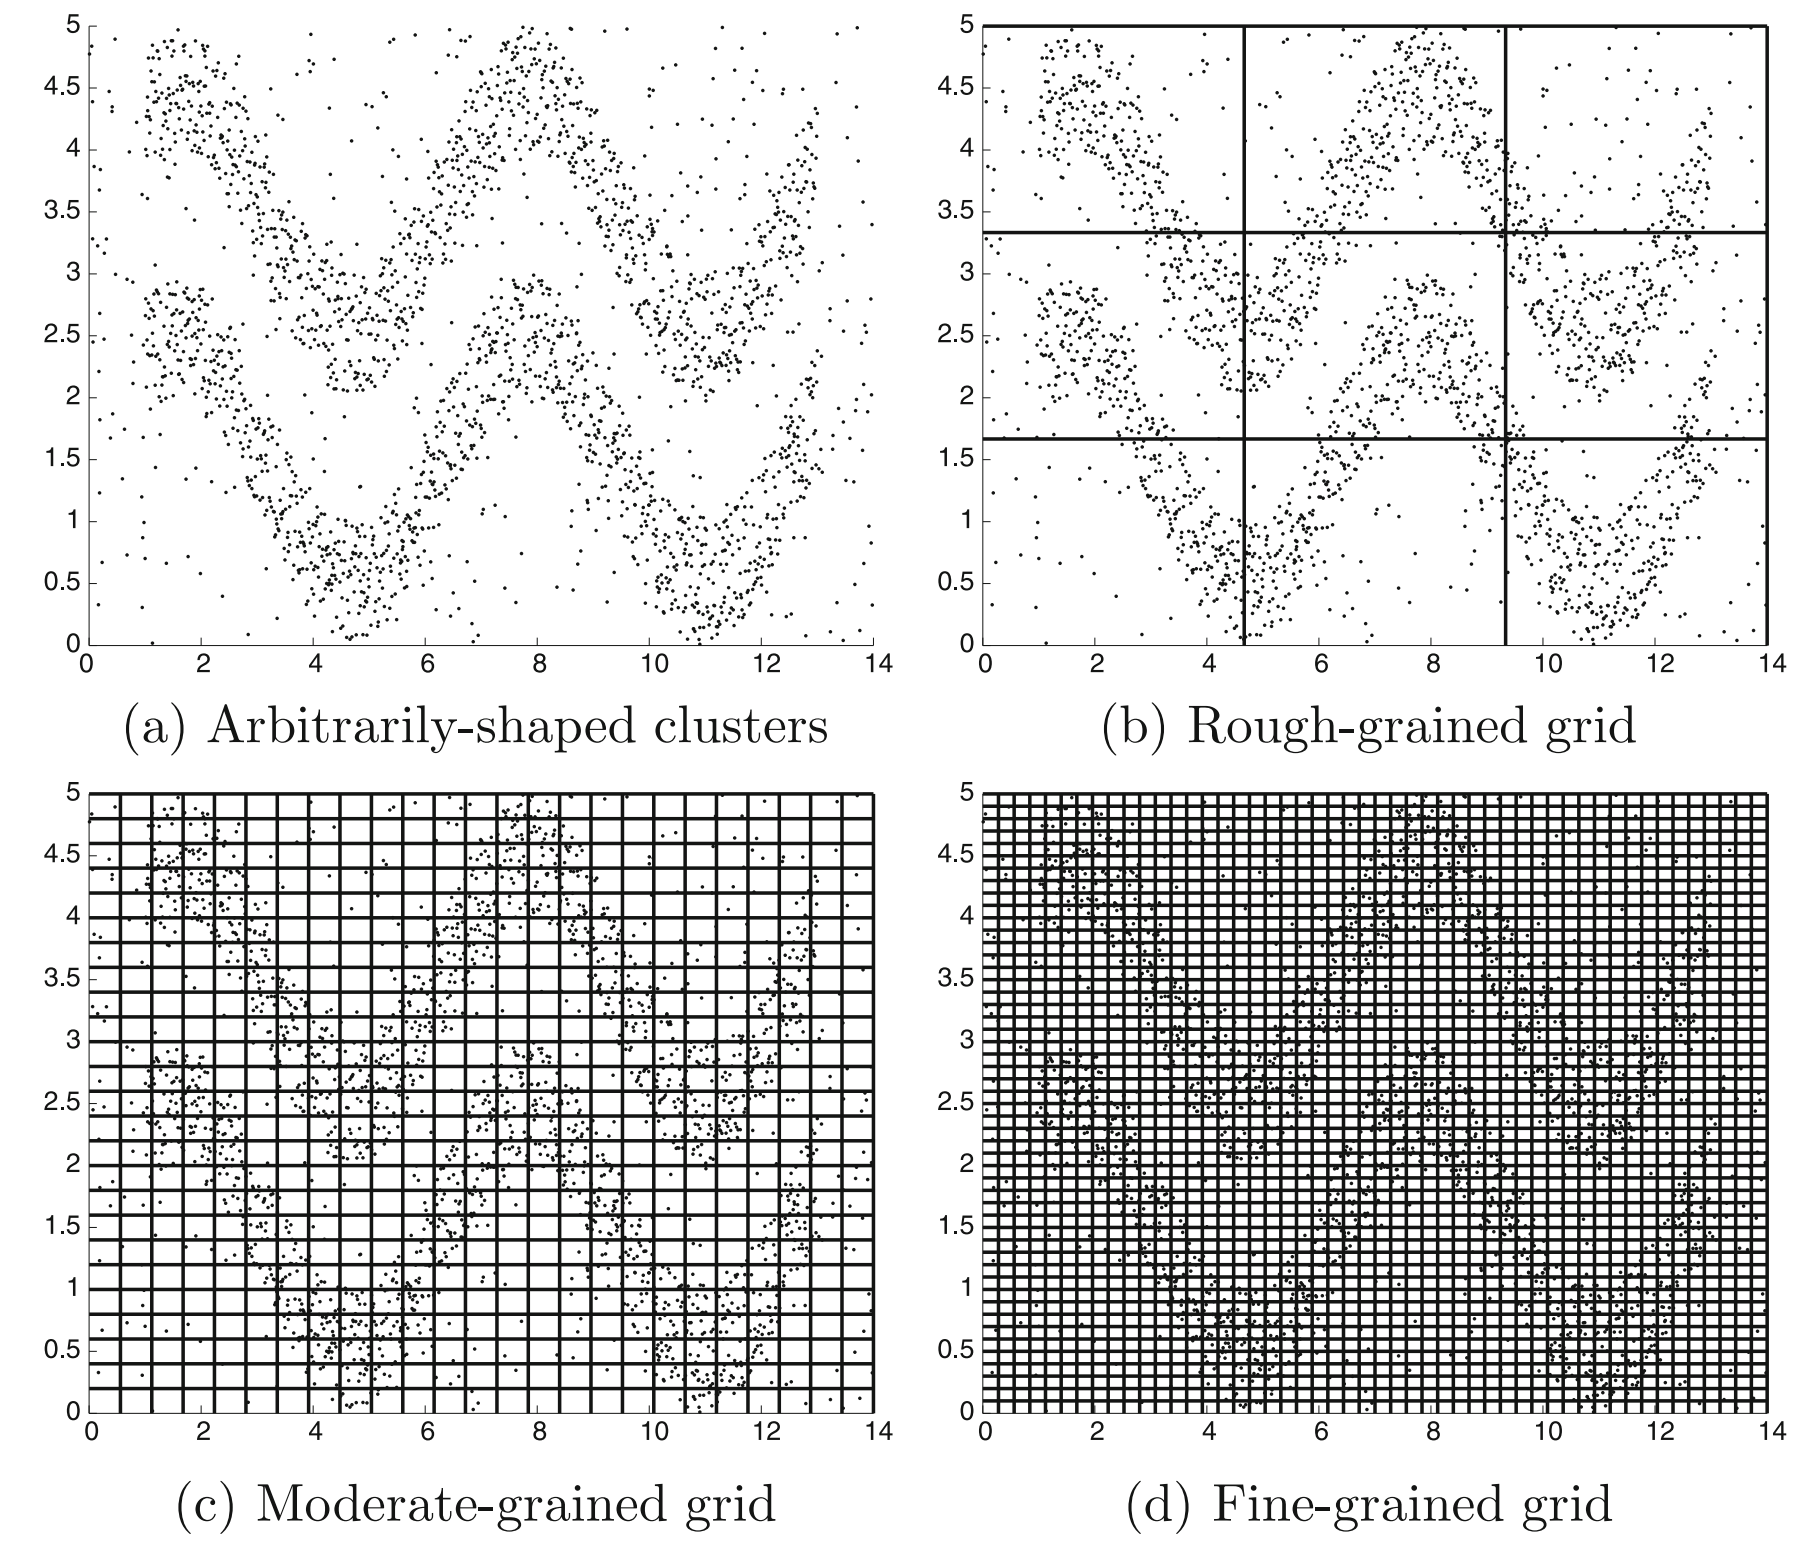
</div>



### Grid-based Methods



Data is discretized into $p$ intervals that are typically equi-width intervals. 
For a $d$-dimensional data set, this leads to a total of $p^d$ hyper-cubes in the underlying data. 

Examples of grids of different granularity with p = 3, 25, and 80 


The resulting hyper-cubes (rectangles in Fig. 6.11) are the building blocks in terms of which
the clustering is defined. A density threshold $\tau$ is used to determine the subset of the $p^d$
hyper-cubes that are dense. 



In most real data sets, an arbitrarily shaped cluster will result
in multiple dense regions that are connected together by a side or at least a corner. Therefore, two grid regions are said to be adjacently connected, if they share a side in common.
A weaker version of this definition considers two regions to be adjacently connected if they
share a corner in common. Many grid-clustering algorithms use the strong definition of
adjacent connectivity, where a side is used instead of a corner. 

In general, for data points
in $k$-dimensional space, two k-dimensional cubes may be defined as adjacent, if they have
share a surface of dimensionality at least $r$, for some user-defined parameter $r < k$.
This directly adjacent connectivity can be generalized to indirect density connectivity
between grid regions that are not immediately adjacent to one another. 



Two grid regions
are **density connected**, if a path can be found from one grid to the other containing only
a sequence of adjacently connected grid regions. The goal of grid-based clustering is to
determine the connected regions created by such grid cells. It is easy to determine such
connected grid regions by using a graph-based model on the grids. Each dense grid node is
associated with a node in the graph, and each edge represents adjacent connectivity. The
connected components in the graph may be determined by using breadth-first or depth-first
traversal on the graph, starting from nodes in different components. The data points in these
connected components are reported as the final clusters. 

An example of the construction of
the clusters of arbitrary shape from the building blocks is illustrated below. Note that
the corners of the clusters found are artificially rectangular, which is one of the limitations
of grid-based methods. 

<div>
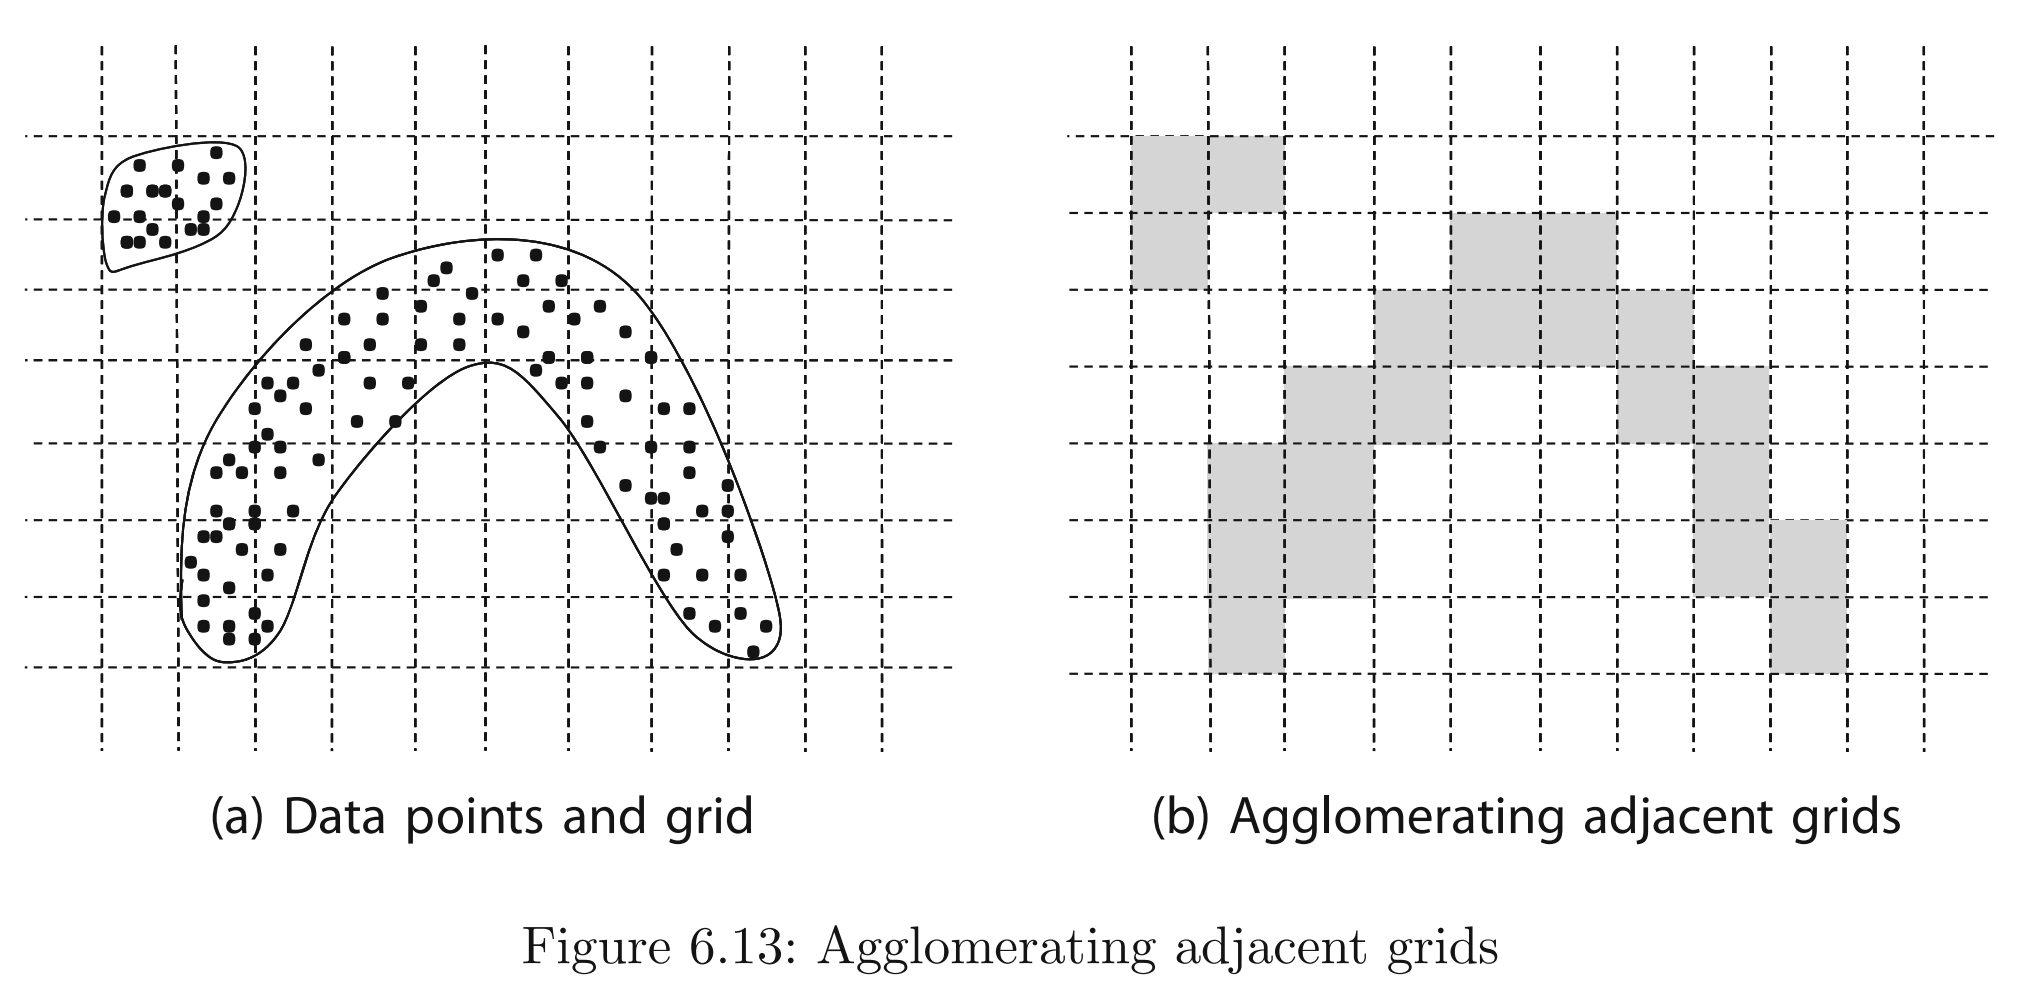
</div>








**Algorithm**: *GenericGrid* <br>
**Input**:
- $D$: a dataset containing $n$ objects
- $p$ : the interval for the grid
- $\tau$: density threshold
**Output**: A set of grid-based clusters <br>
**Method**: <br>
$\quad$ **begin** <br>
$\quad$$\quad$ Discretize each dimension of data $D$ into $p$ ranges <br>
$\quad$$\quad$ Determine dense grid cells at density level $\tau$ <br>
$\quad$$\quad$ Create graph in which dense grids are connected if they are adjacent <br>
$\quad$$\quad$ Discretize each dimension of data $D$ into $p$ ranges <br>
$\quad$$\quad$ Determine connected components of graph <br>
$\quad$**return** points in each connected component as a cluster  <br>
**end**


**Advantage**: One desirable property of grid-based (and most other density-based) algorithms is that
the number of data clusters is not pre-defined in advance, as in k-means algorithms. Rather,
the goal is to return the natural clusters in the data together with their corresponding
shapes. 

**Disadvantage**: On the other hand, two different parameters need to be defined corresponding
to the number of grid ranges $p$ and the density threshold $\tau$. The correct choice of these
parameters is often difficult and semantically un-intuitive to guess. An inaccurate choice
can lead to unintended consequences.

* When the number of grid ranges selected is too small, the data points from multiple clusters will be present in the same grid region. When the number of grid ranges selected is too large, this will result in many empty grid cells even within the clusters. As a result, natural clusters in the data may be disconnected by the algorithm. A larger number of grid ranges also leads to computational challenges because of the increasing number of grid cells
* The choice of the density threshold has a similar effect on the clustering. For example,
when the density threshold τ is too low, all clusters, including the ambient noise, will
be merged into a single large cluster. On the other hand, an unnecessarily high density
can partially or entirely miss a cluster.

<div>
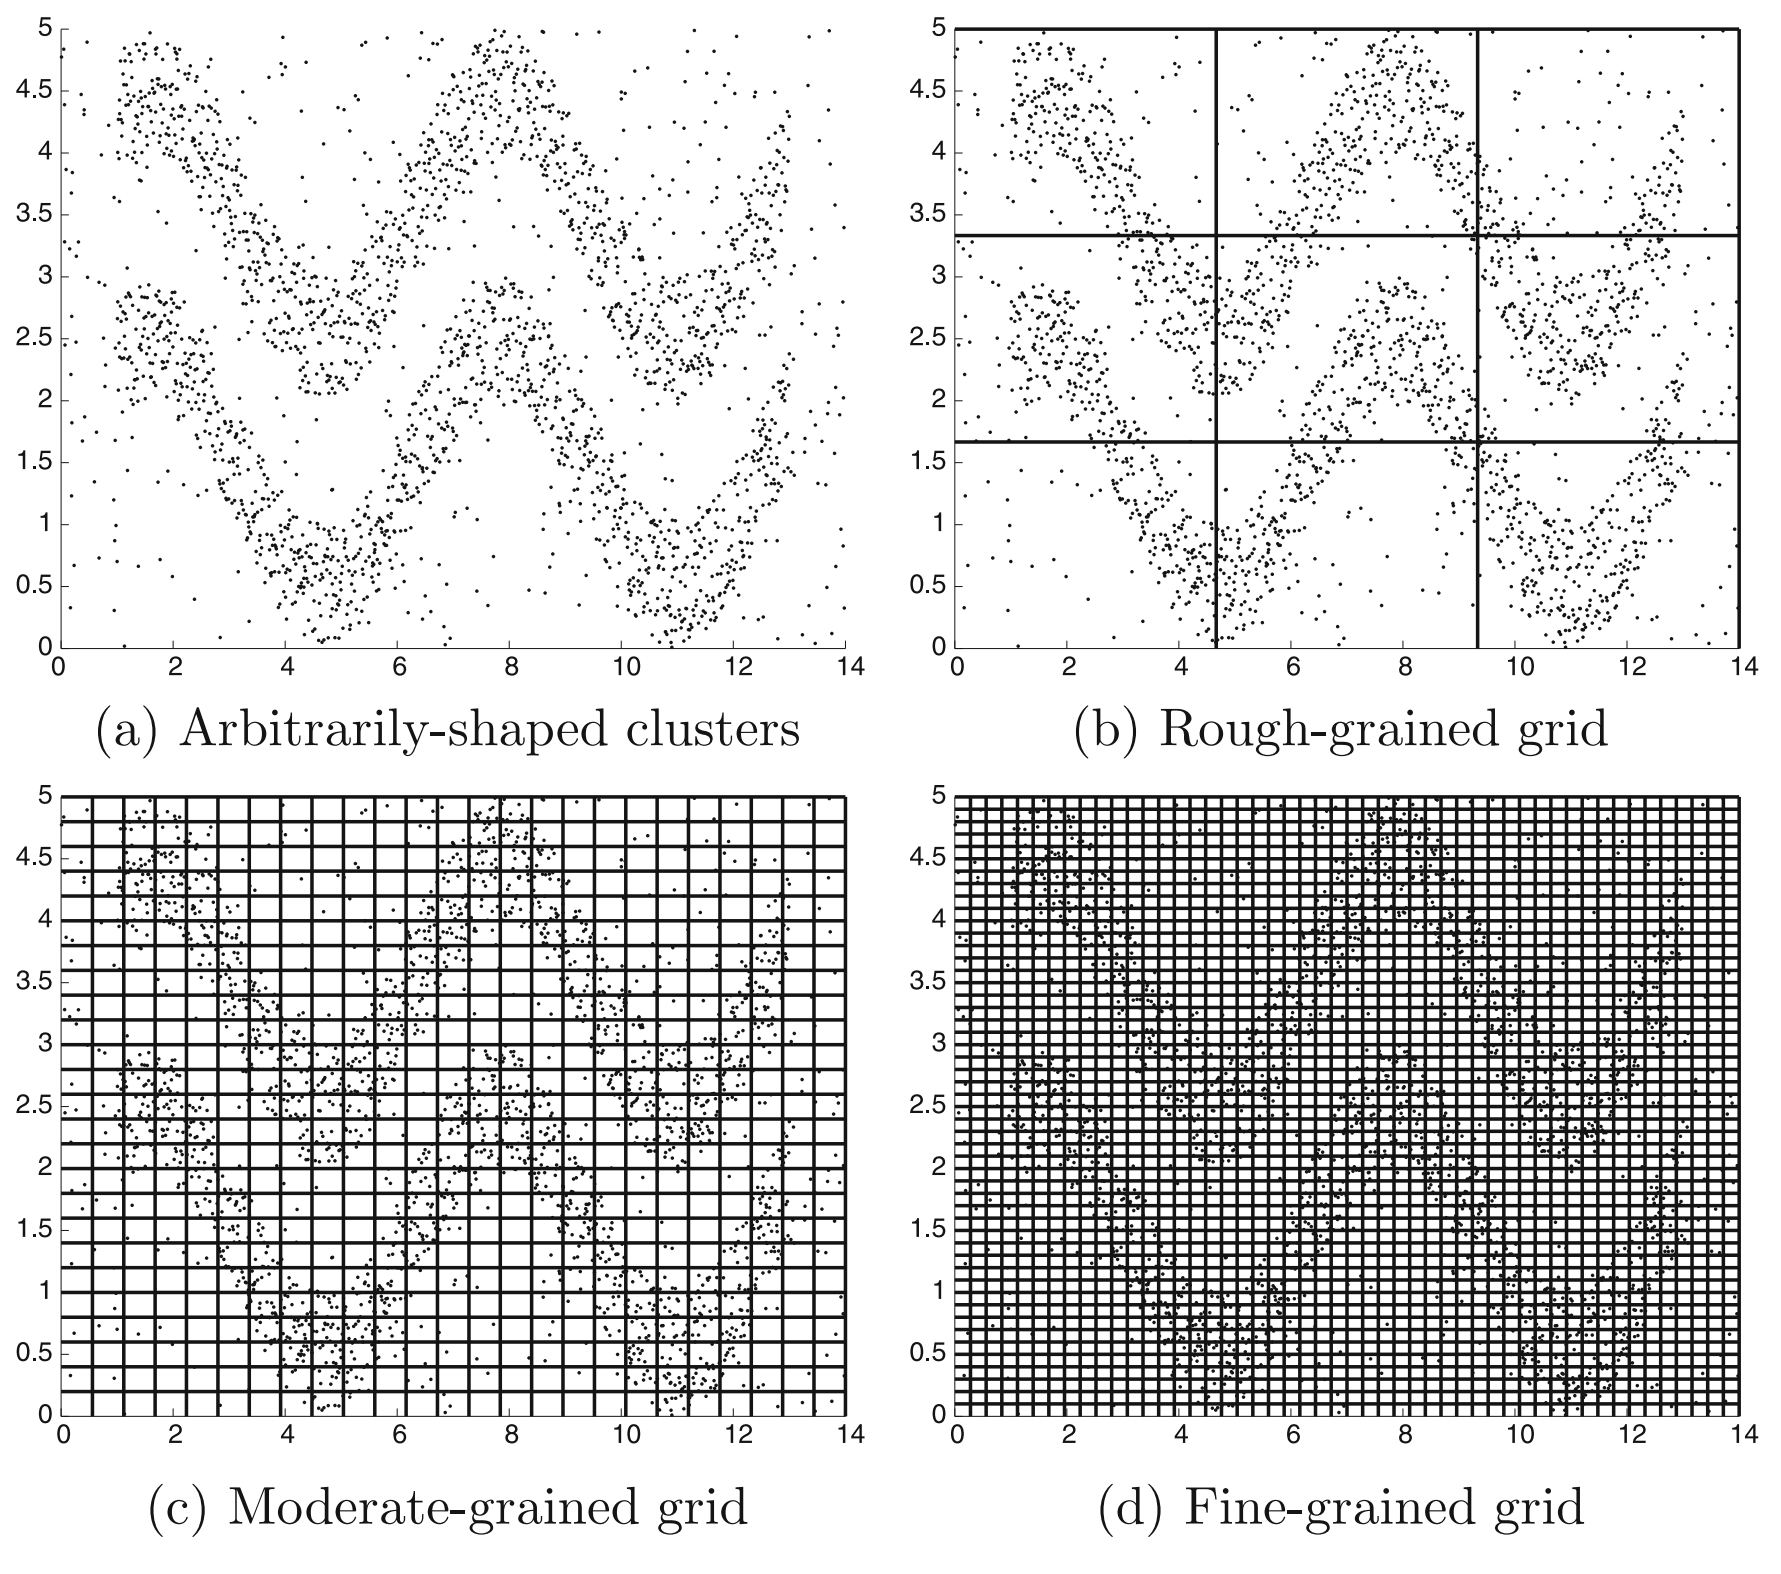
</div>


**Practical Issues**

* Do not need to specify number of clusters
* Does not need to assume any shape of the clusters
* Need to specify global parameters: density parameter $\tau$ and grid resolution $p$ 
* grid-base dmethods become computationally infeasible in high dimensions because the number of grid cells increase exponentially with the underlying data dimensionality


Sources: 
- "Data Mining, The Textbook", Charu C. Aggarwal, 2015 Springer
- "Data Mining, Concepts and Techniques", 3rd Ed. Ha, Kamber, Pei, 2012 Elsevier
- "Data Clustering: Algorithms and Applications, Aggarwal and Reddy, 2014, CRC Press
